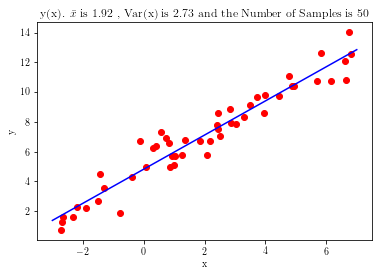

[1.20399466 1.2674415  1.25777051 ... 1.17516376 1.20102141 1.1802364 ]
avgA = 1.201, avgB = 4.716, Var(a) = 0.04333, Var(b) = 0.08846



In [2]:
import numpy as np
import matplotlib.pyplot as plt
# example data
# mu = 100 mean of distribution
def sigmaSumFactor(sigma, V):
    A = 0
    for i in range (0,len(V)):
        A = A + V[i]/((sigma[i])**2)
    return A
#שימוש בקוד מהתרגיל הקודם
def abplot(y, x, deltaY):
    A = sigmaSumFactor(deltaY, x)
    B = sigmaSumFactor(deltaY, np.ones(len(x)))
    C = sigmaSumFactor(deltaY, y)
    D = sigmaSumFactor(deltaY, x*x)
    E = sigmaSumFactor(deltaY, x*y)
#   F = sigmaSumFactor(deltaY, y*y)
    aHat = ((B*E-A*C)/(D*B-A*A))
    bHat = ((C*D-A*E)/(D*B-A*A))
    return [aHat,bHat]
def f(a,b,x):
    return [i * a + b for i in x]
sampleNum = 50
x = np.random.uniform(-3, 7, sampleNum)
#נגדיר את אפסילון בתור מספר רנדונלי שמתפלג נורמלית סביב 0 עם סטיית תקן 1.
epsilon = np.random.normal(0, 1, sampleNum)
y = 1.2*x + 5 + epsilon
deltaY = np.ones(len(x))
plotVars = abplot(y, x, deltaY)

#יצירת הקו
x1 = [-3,7]
y1 = f(plotVars[0],plotVars[1],x1)
avg = np.average(x)
#should be 2 from symetry, 2 = (-3+7)/2
var = np.std(x)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, y, 'ro', x1, y1, 'blue')
plt.ylabel('y')
plt.xlabel('x')
plt.title('y(x).' + r' $\bar{x}$ is %.2f' %(avg) +' , Var(x) is %.2f' % (var) + ' and the Number of Samples is ' + str(sampleNum))
plt.show()
#end of section c. i did some extra stuff because its fun.

#section d:
sampleNumD = 10000
a_D = np.zeros(sampleNumD)
b_D = np.zeros(sampleNumD)
for i in range(0,sampleNumD):
    x_D = np.random.uniform(-3, 7, sampleNum)
    #נגדיר את אפסילון בתור מספר רנדונלי שמתפלג נורמלית סביב 0 עם סטיית תקן 1.
    epsilon_D = np.random.normal(0, 1, sampleNum)
    y_D = 1.2*x_D + 5 + epsilon
    deltaY_D = np.ones(len(x_D))
    plotVars_D = abplot(y_D, x_D, deltaY)
    
    a_D[i] = plotVars_D[0]
    b_D[i] = plotVars_D[1]
    
print(a_D)
avgA = np.average(a_D)
avgB = np.average(b_D)
varA = np.std(a_D)
varB = np.std(b_D)
#expected values: avgA = 1.2, avgB = 5. from the definition of y
print("avgA = %.3f"%avgA + ", avgB = %.3f"%avgB + ", Var(a) = %.5f"%varA + ", Var(b) = %.5f"%varB)
#plt.plot()
#plt.text(0.5, 0.5,'$\bar{a}$ = %.2f and $\bar{b}$ = %.2f'%(avgA, avgB))
#plt.show()
print()
#x1 = [-3,7]
#y1 = 1.2*x1
#plt.plot(x1, y1, 'r', x, y, 'b')
#plt.show()
#sigma2 = np.std(tl, 1)
#avg2 = np.empty(len(tl), dtype='double')
#for i in range(0, len(tl)):
#    avg2[i] = np.average(tl[i])
#    print("average %d = " %i, np.average(tl[i]))
#    print("avg2 = ", avg2)

#print(sigma2, avg)


#num_bins = 20
# the histogram of the data
#n, bins, patches = plt.hist(x, num_bins, range=(0, 1), facecolor='turquoise', alpha=0.63)

# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'r--')
#plt.plot_date
#plt.plot(x, 0*x + 0.5*30*2, range=(0, 1),  color='blue', alpha=1, linestyle='dashdot')
#plt.xlabel('number between 0 to 1')
#plt.ylabel('count')
#plt.title(r'Histogram of random numbers: $\sigma=%f$, $avg=%f$' %(sigma, avg))

# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
#plt.show()
